###### Scientific Computing with Python (Second Edition)

# Chapter 06

*We start by importing all from Numpy. As explained in Chapter 01 the examples are written assuming this import is initially done.*
* Due to graphical reasons, we changed the coordinates from the examples given in the book in order to meet
with the browser's typesetting. You are encouraged to modify the locations corresponding to your requirements.
* In Jupyter notebook, you have to restart the kernel when re-executing things, otherwise you might get warnings.

In [1]:
%matplotlib notebook
from matplotlib.pyplot import *
from numpy import *

## 6.1 Making plots with basic plotting commands
### 6.1.1 Using the plot command and some of its variants

<IPython.core.display.Javascript object>


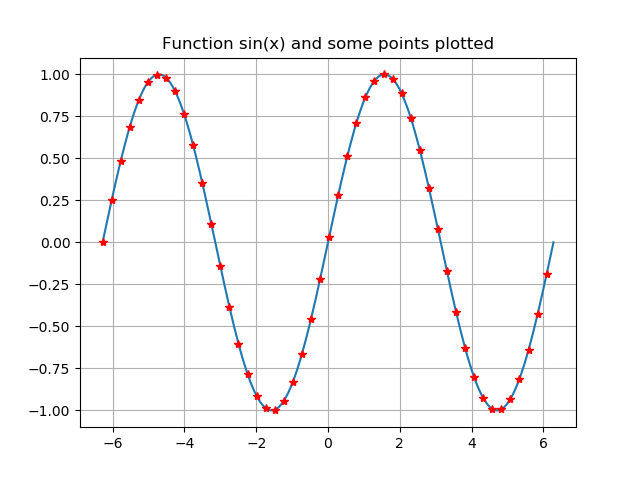

In [2]:
# plot sin(x) for some interval
x = linspace(-2*pi,2*pi,200)
plot(x,sin(x))

# plot marker for every 4th point
samples = x[::4]
plot(samples,sin(samples),'r*')

# add title and grid lines
title('Function sin(x) and some points plotted')
grid()

<IPython.core.display.Javascript object>


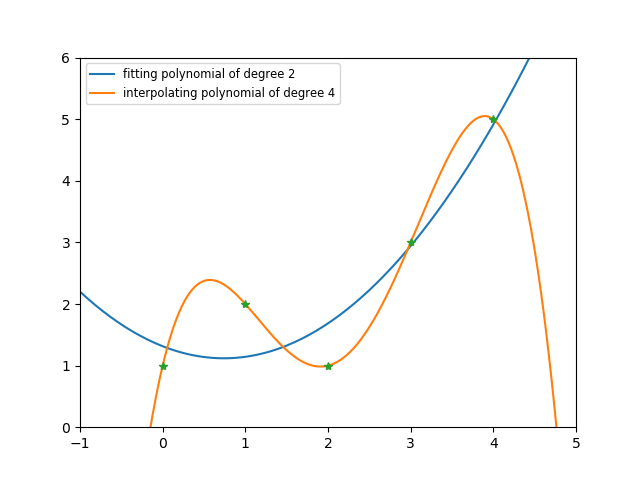

In [3]:
figure(2)
# —Polyfit example—
x = range(5)
y = [1,2,1,3,5]
p2 = polyfit(x,y,2) # coefficients of degree 2 polynomial
p4 = polyfit(x,y,4) # coefficients of degree 4 polynomial 

# plot the two polynomials and points
xx = linspace(-1,5,200) 
plot(xx, polyval(p2, xx), label='fitting polynomial of degree 2')
plot(xx, polyval(p4, xx),
                label='interpolating polynomial of degree 4') 
plot(x,y,'*')

# set the axis and legend
axis([-1,5,0,6])
legend(loc='upper left', fontsize='small')

<IPython.core.display.Javascript object>


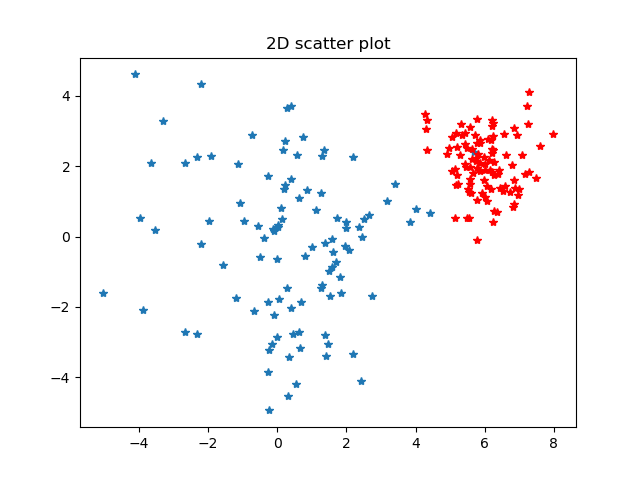

Text(0.5, 1.0, '2D scatter plot')

In [4]:
figure(3)
# create random 2D points
import numpy
x1 = 2*numpy.random.standard_normal((2,100))
x2 = 0.8*numpy.random.standard_normal((2,100)) + array([[6],[2]])
plot(x1[0],x1[1],'*')
plot(x2[0],x2[1],'r*')
title('2D scatter plot')

<IPython.core.display.Javascript object>


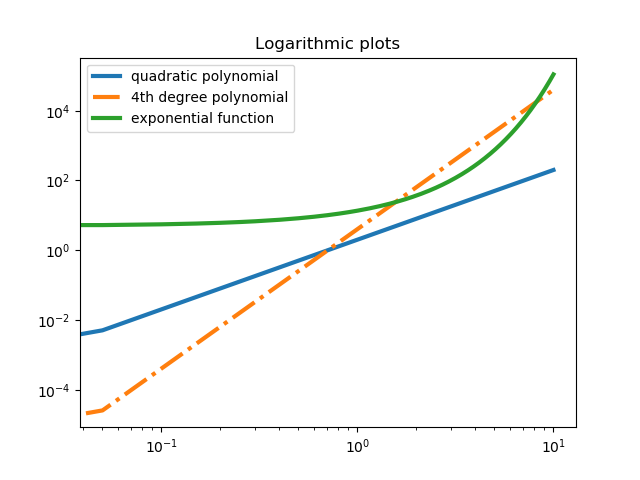

In [5]:
figure(4)
# log both x and y axis 
x = linspace(0,10,200) 
loglog(x,2*x**2, label = 'quadratic polynomial',
                            linestyle = '-', linewidth = 3)
loglog(x,4*x**4, label = '4th degree polynomial',
                            linestyle = '-.', linewidth = 3)
loglog(x,5*exp(x), label = 'exponential function', linewidth = 3)
title('Logarithmic plots')
legend(loc = 'best')

### 6.1.2 Formatting


<IPython.core.display.Javascript object>


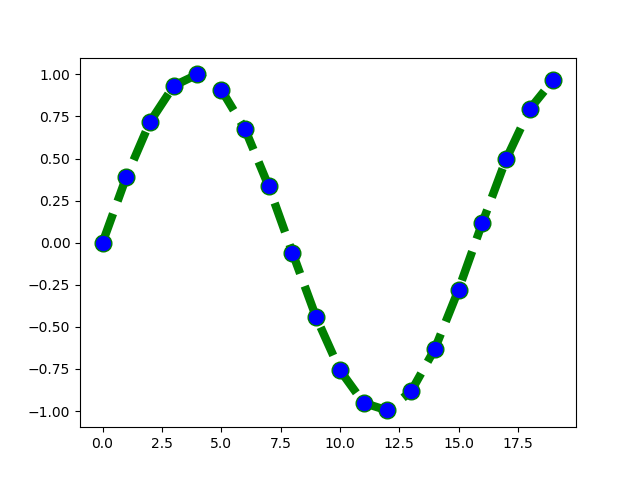

In [6]:
figure(5)
k = 0.2
x = [sin(2*n*k) for n in range(20)]
plot(x, color='green', linestyle='dashed', marker='o', 
                       markerfacecolor='blue', markersize=12, linewidth=6)

<IPython.core.display.Javascript object>


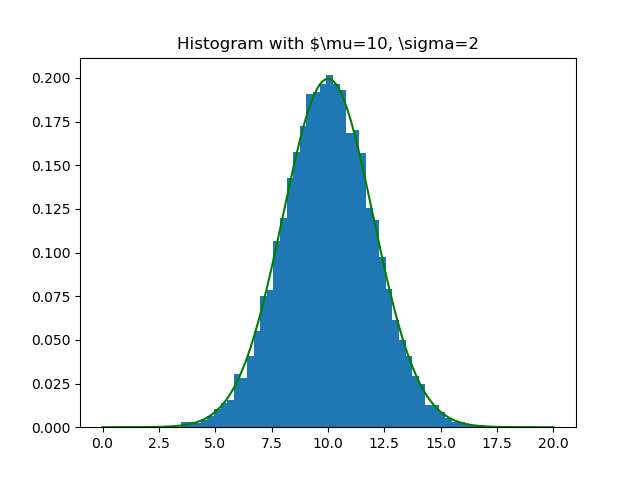

Text(0.5, 1.0, 'Histogram with $\\mu=10, \\sigma=2')

In [7]:
figure(6)
# random vector with normal distribution
sigma, mu = 2, 10
x = sigma*numpy.random.standard_normal(10000)+mu 
hist(x,50,density=True)
z = linspace(0,20,200)
plot(z, (1/sqrt(2*pi*sigma**2))*exp(-(z-mu)**2/(2*sigma**2)),'g')
# title with LaTeX formatting 
title(fr'Histogram with $\mu={mu}, \sigma={sigma}')

*Note, as we are plooting random data, the plot needs not to be identical with the one displayed in the book.*

<IPython.core.display.Javascript object>


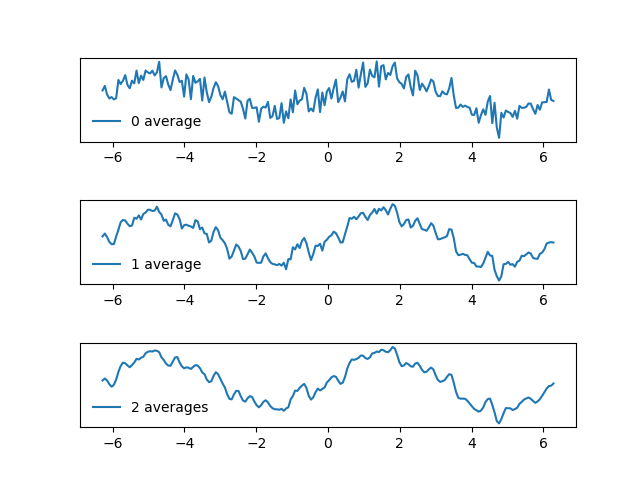

In [8]:
figure(7)
def avg(x):
    """ simple running average """
    return (roll(x,1) + x + roll(x,-1)) / 3
# sine function with noise
x = linspace(-2*pi, 2*pi,200)
y = sin(x) + 0.4*numpy.random.standard_normal(200)

# make successive subplots
for iteration in range(3):
    subplot(3, 1, iteration + 1)
    plot(x,y, label = '{:d} average{}'.format(iteration, 's' if iteration > 1 else ''))
    yticks([])
    legend(loc = 'lower left', frameon = False)
    y = avg(y) #apply running average 
subplots_adjust(hspace = 0.7)

In [9]:
savefig('test.pdf', transparent=True)

### 6.1.3 Working with meshgrid and contours

In [10]:
n = 4 # number of discretization points along the x-axis
m = 5 # number of discretization points along the x-axis 
X,Y = meshgrid(linspace(1,2,n), linspace(3,4,m))
print(X)
print(Y)

[[1.         1.33333333 1.66666667 2.        ]
 [1.         1.33333333 1.66666667 2.        ]
 [1.         1.33333333 1.66666667 2.        ]
 [1.         1.33333333 1.66666667 2.        ]
 [1.         1.33333333 1.66666667 2.        ]]
[[3.   3.   3.   3.  ]
 [3.25 3.25 3.25 3.25]
 [3.5  3.5  3.5  3.5 ]
 [3.75 3.75 3.75 3.75]
 [4.   4.   4.   4.  ]]


<IPython.core.display.Javascript object>


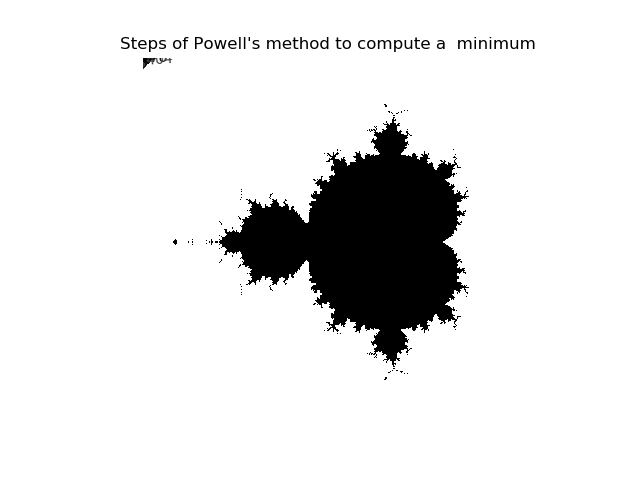

Text(0, 0.5, 'y')

In [11]:
figure(8)
rosenbrockfunction = lambda x,y: (1-x)**2+100*(y-x**2)**2 
X,Y = meshgrid(linspace(-.5,2.,100), linspace(-1.5,4.,100))
Z = rosenbrockfunction(X,Y) 
contour(X,Y,Z,logspace(-0.5,3.5,20,base=10),cmap='gray') 
title('Rosenbrock Function: ')
xlabel('x')
ylabel('y')

In [12]:
import scipy.optimize as so
rosenbrockfunction = lambda x,y: (1-x)**2+100*(y-x**2)**2
X,Y=meshgrid(linspace(-.5,2.,100),linspace(-1.5,4.,100))
Z=rosenbrockfunction(X,Y)
cs=contour(X,Y,Z,logspace(0,3.5,7,base=10),cmap='gray')
rosen=lambda x: rosenbrockfunction(x[0],x[1])
solution, iterates = so.fmin_powell(rosen,x0=array([0,-0.7]),retall=True)
x,y=zip(*iterates)
plot(x,y,'ko') # plot black bullets
plot(x,y,'k:',linewidth=1) # plot black dotted lines
title("Steps of Powell's method to compute a  minimum")
clabel(cs)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 16
         Function evaluations: 462


<a list of 11 text.Text objects>

*The result is included in the previous figure*

### 6.1.4 Generating images and contours


In [13]:
def mandelbrot(h,w, maxit=20):
    X,Y = meshgrid(linspace(-2, 0.8, w), linspace(-1.4, 1.4, h))
    c = X + Y*1j
    z = c
    exceeds = zeros(z.shape, dtype=bool)

    for iteration in range(maxit):
        z  = z**2 + c
        exceeded = abs(z) > 4
        exceeds_now = exceeded & (logical_not(exceeds))  
        exceeds[exceeds_now] = True        
        z[exceeded] = 2  # limit the values to avoid overflow
    return exceeds

imshow(mandelbrot(400,400),cmap='gray')
axis('off')

(-0.5, 399.5, 399.5, -0.5)

<IPython.core.display.Javascript object>


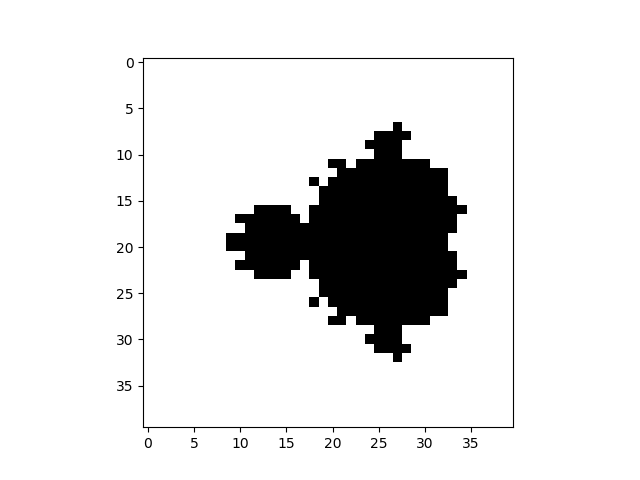

In [14]:
figure(9)
imshow(mandelbrot(40,40), interpolation='nearest', cmap='gray')

##  6.2 Working with Matplotlib objects directly
### 6.2.1 Creating axes objects


<IPython.core.display.Javascript object>


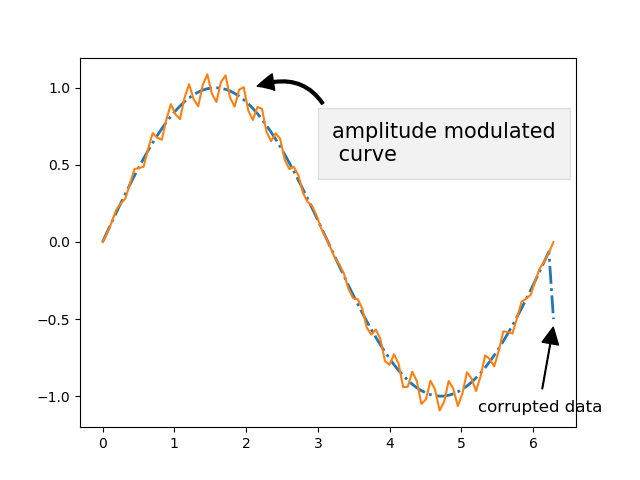

In [15]:
fig = figure(10) 
ax = subplot(111)
x = linspace(0,2*pi,100) 
# We set up a function that modulates the amplitude of the sin function
amod_sin = lambda x: (1.-0.1*sin(25*x))*sin(x)
# and plot both...
ax.plot(x,sin(x),label = 'sin') 
ax.plot(x, amod_sin(x), label = 'modsin')

In [16]:
for il,line in enumerate(ax.lines):
    if line.get_label() == 'sin':
       break
line

In [17]:
line

###  6.2.2 Modifying line properties

In [18]:
type(ax.lines[il].properties())

dict

In [19]:
ax.lines[il].set_linestyle('-.')
ax.lines[il].set_linewidth(2)

*The result is included in the previous figure*

In [20]:
ydata=ax.lines[il].get_ydata()
ydata[-1]=-0.5
ax.lines[il].set_ydata(ydata)

*The result is included in the previous figure*

### 6.2.3 Making annotations

In [21]:
annot1=ax.annotate('amplitude modulated\n curve', (2.1,1.0),(3.2,0.5),
       arrowprops={'width':2,'color':'k', 'connectionstyle':'arc3,rad=+0.5', 
                   'shrink':0.05},
       verticalalignment='bottom', horizontalalignment='left',fontsize=15, 
                   bbox={'facecolor':'gray', 'alpha':0.1, 'pad':10})
annot2=ax.annotate('corrupted data', (6.3,-0.5),(6.1,-1.1),
       arrowprops={'width':0.5,'color':'k','shrink':0.1},
       horizontalalignment='center', fontsize=12)

*The result is included in the previous figure*

### 6.2.4 Filling areas between curves
We reconstruct the previous figure first

<IPython.core.display.Javascript object>


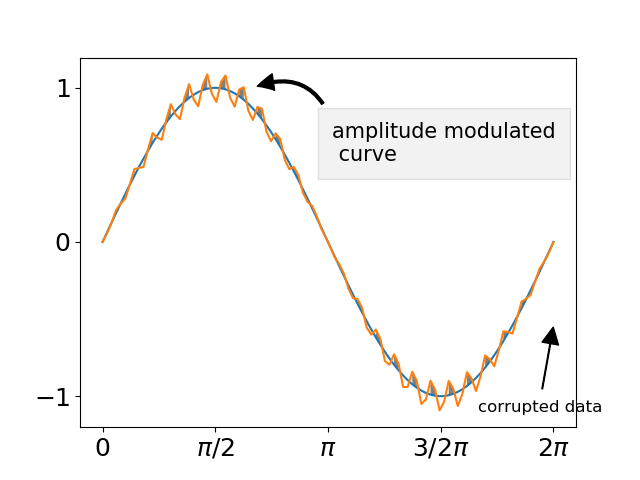

In [22]:
fig = figure(11) 
ax = subplot(111)
x = linspace(0,2*pi,100) 
# We set up a function that modulates the amplitude of the sin function
amod_sin = lambda x: (1.-0.1*sin(25*x))*sin(x)
# and plot both...
ax.plot(x,sin(x),label = 'sin') 
ax.plot(x, amod_sin(x), label = 'modsin')
annot1=ax.annotate('amplitude modulated\n curve', (2.1,1.0),(3.2,0.5),
       arrowprops={'width':2,'color':'k', 'connectionstyle':'arc3,rad=+0.5', 
                   'shrink':0.05},
       verticalalignment='bottom', horizontalalignment='left',fontsize=15, 
                   bbox={'facecolor':'gray', 'alpha':0.1, 'pad':10})
annot2=ax.annotate('corrupted data', (6.3,-0.5),(6.1,-1.1),
       arrowprops={'width':0.5,'color':'k','shrink':0.1},
       horizontalalignment='center', fontsize=12)

In [23]:
axf = ax.fill_between(x, sin(x), amod_sin(x), facecolor='gray')

In [24]:
axf.remove()

In [25]:
axf = ax.fill_between(x, sin(x), amod_sin(x),where=amod_sin(x)-sin(x) > 0, facecolor='gray')

### 6.2.5 Defining ticks and tick labels


In [26]:
ax.set_xticks(array([0,pi/2,pi,3/2*pi,2*pi]))
ax.set_xticklabels(('$0$','$\pi/2$','$\pi$','$3/2 \pi$','$2 \pi$'),fontsize=18)
ax.set_yticks(array([-1.,0.,1]))
ax.set_yticklabels(('$-1$','$0$','$1$'),fontsize=18)

[Text(0, 0, '$-1$'), Text(0, 0, '$0$'), Text(0, 0, '$1$')]

*The result is included in the previous figure*

### 6.2.6 Setting spines makes your plot more instructive – a comprehensive example

<IPython.core.display.Javascript object>


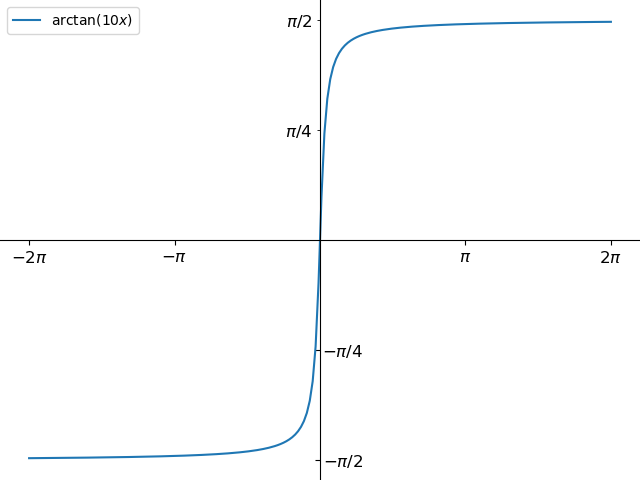

In [27]:
fig = figure(12)
ax = fig.add_axes((0.,0.,1,1))
ax.spines["left"].set_position(('data',0.))
ax.spines["bottom"].set_position(("data",0.))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
x=linspace(-2*pi,2*pi,200)
ax.plot(x,arctan(10*x), label=r'$\arctan(10 x)$')
ax.legend()

In [28]:
ax.set_xticks([-2*pi,-pi,pi,2*pi])
ax.set_xticklabels([r"$-2\pi$",r"$-\pi$",r"$\pi$", r"$2\pi$"])
ax.set_yticks([pi/4,pi/2], minor=True)
ax.set_yticklabels([r"$\pi/4$", r"$\pi/2$"], minor=True)
ax.set_yticks([-pi/4,-pi/2], minor=False,)
ax.set_yticklabels([r"$-\pi/4$", r"$-\pi/2$"], minor=False) # major label set
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='y', which='major',pad=-35) # move labels to the right
ax.tick_params(axis='both', which='minor', labelsize=12)

*The result is included in the previous figure*

## 6.3 Making 3D plots

<IPython.core.display.Javascript object>


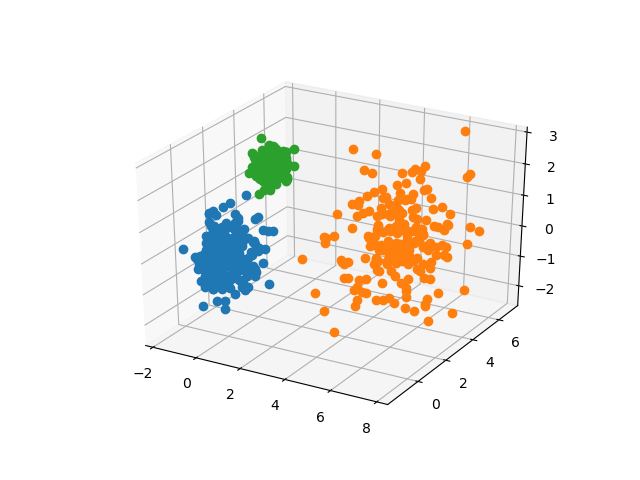

In [29]:
from mpl_toolkits.mplot3d import axes3d

fig = figure(13)
ax = fig.gca(projection='3d')
# plot points in 3D
class1 = 0.6 * random.standard_normal((200,3))
ax.plot(class1[:,0],class1[:,1],class1[:,2],'o')
class2 = 1.2 * random.standard_normal((200,3)) + array([5,4,0])
ax.plot(class2[:,0],class2[:,1],class2[:,2],'o')
class3 = 0.3 * random.standard_normal((200,3)) + array([0,3,2])
ax.plot(class3[:,0],class3[:,1],class3[:,2],'o')

<IPython.core.display.Javascript object>


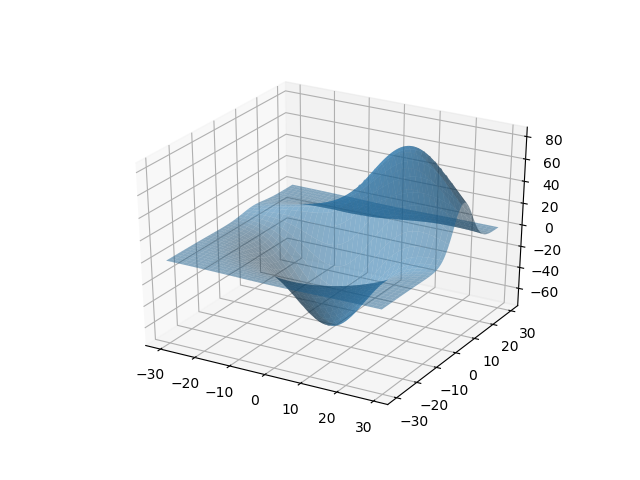

In [30]:
X,Y,Z = axes3d.get_test_data(0.05)

fig = figure(14)
ax = fig.gca(projection='3d')
# surface plot with transparency 0.5 
ax.plot_surface(X,Y,Z,alpha=0.5)

<IPython.core.display.Javascript object>


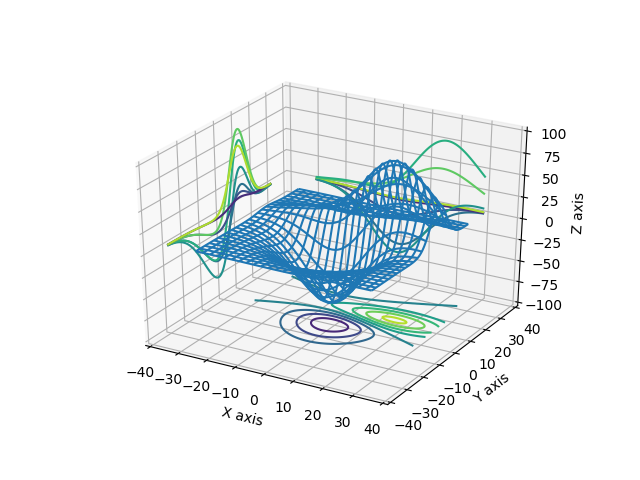

Text(0.5, 0, 'Z axis')

In [31]:
fig = figure(15)
ax = fig.gca(projection = '3d')
ax.plot_wireframe(X,Y,Z,rstride = 5,cstride = 5)

# plot contour projection on each axis plane
ax.contour(X,Y,Z, zdir='z',offset = -100)
ax.contour(X,Y,Z, zdir='x',offset = -40)
ax.contour(X,Y,Z, zdir='y',offset = 40)

# set axis limits
ax.set_xlim3d(-40,40)
ax.set_ylim3d(-40,40)
ax.set_zlim3d(-100,100)

# set labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

## 6.4 Making movies from plots

*If the next cell raises a Module not found exception. you have to install visvis first*
`conda install visvis`


In [32]:
import visvis.vvmovie as vv

# create initial function values
x = linspace(-255,255,511)
X,Y = meshgrid(x,x)
f = sqrt(X*X+Y*Y) - 40 #radius 40

# evolve and store in a list
imlist = []
for iteration in range(200):
    imlist.append((f>0)*255)
    f -= 1 # move outwards one pixel
vv.images2swf.writeSwf('circle_evolution.swf',imlist)

*We don't present the last code example as its movie making execution takes a lot of CPU time.*